<a href="https://colab.research.google.com/github/sharop/TallerGrafos25/blob/main/explorar_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

El sector de la banca minorista enfrenta grandes retos para gestionar depósitos debido a cambios en las tasas de interés, comportamientos de los clientes cada vez más variables y avances tecnológicos constantes. Hasta 2025 se espera un crecimiento lento en los depósitos, mientras que su costo ha subido, afectando las ganancias por intereses de los bancos. Existe una fuerte competencia por obtener depósitos, ya que los bancos necesitan liquidez y los clientes no aceptan fácilmente tasas más bajas. Además, la situación económica general y la incertidumbre política también influyen en el comportamiento de clientes y empresas. Por esto, los bancos están enfocados en captar y mantener clientes, ofrecer precios personalizados y mejorar la experiencia digital.





# 2. Escenario

Las bases de datos de grafos son muy efectivas para analizar la complejidad de los depósitos en la banca minorista. Utilizando las relaciones entre clientes, cuentas y transacciones, estas bases permiten que los bancos representen visualmente y analicen el comportamiento de los clientes. Esto ayuda a optimizar estrategias de precios, identificar posibles riesgos y personalizar ofertas según necesidades específicas y tendencias del mercado.

En comparación con los sistemas tradicionales, las bases de datos de grafos ofrecen análisis en tiempo real, respuestas más rápidas y mejores capacidades de modelado. Estas ventajas se traducen en mejores experiencias para el cliente, gestión de riesgos más eficiente y mayor rentabilidad para los bancos.



# 3. Solución

Las bases de datos de grafos ofrecen un enfoque único para analizar depósitos bancarios, superando las limitaciones de las bases de datos tradicionales (relacionales). Estas bases pueden modelar relaciones complejas entre clientes, cuentas y transacciones, algo esencial para entender el comportamiento de los depósitos. Esta metodología es similar al uso de grafos para detección de fraudes.

Usando teoría de grafos, estas bases representan claramente entidades (clientes, cuentas) y sus conexiones (transacciones). Esto facilita análisis más profundos que van más allá de simples datos aislados, ayudando a los bancos a gestionar depósitos eficientemente.

### 3.1 ¿Cómo pueden ayudar las bases de datos de grafos?

- **Análisis de enlaces:** Explorar conexiones entre datos demográficos de clientes, actividades en cuentas e historial de transacciones para entender patrones complejos en depósitos. Esto facilita visualizar cómo diversos factores afectan las tendencias.

- **Detección de patrones:** Al igual que en la detección de fraudes, las bases de grafos analizan depósitos para descubrir relaciones ocultas y tendencias emergentes. Por ejemplo, identificar grupos de clientes con comportamientos similares o detectar movimientos inusuales de dinero.

- **Análisis en tiempo real:** Monitorean y analizan actividades de depósitos al instante, permitiendo que los bancos respondan rápidamente a cambios inesperados en el comportamiento de los clientes o en las condiciones del mercado.

En resumen, las bases de datos de grafos son superiores en situaciones donde la información es compleja e interconectada. Al adoptar esta tecnología, los bancos mejoran su comprensión del comportamiento del cliente y perfeccionan sus estrategias para gestionar depósitos.

4.1 Modelo de Datos
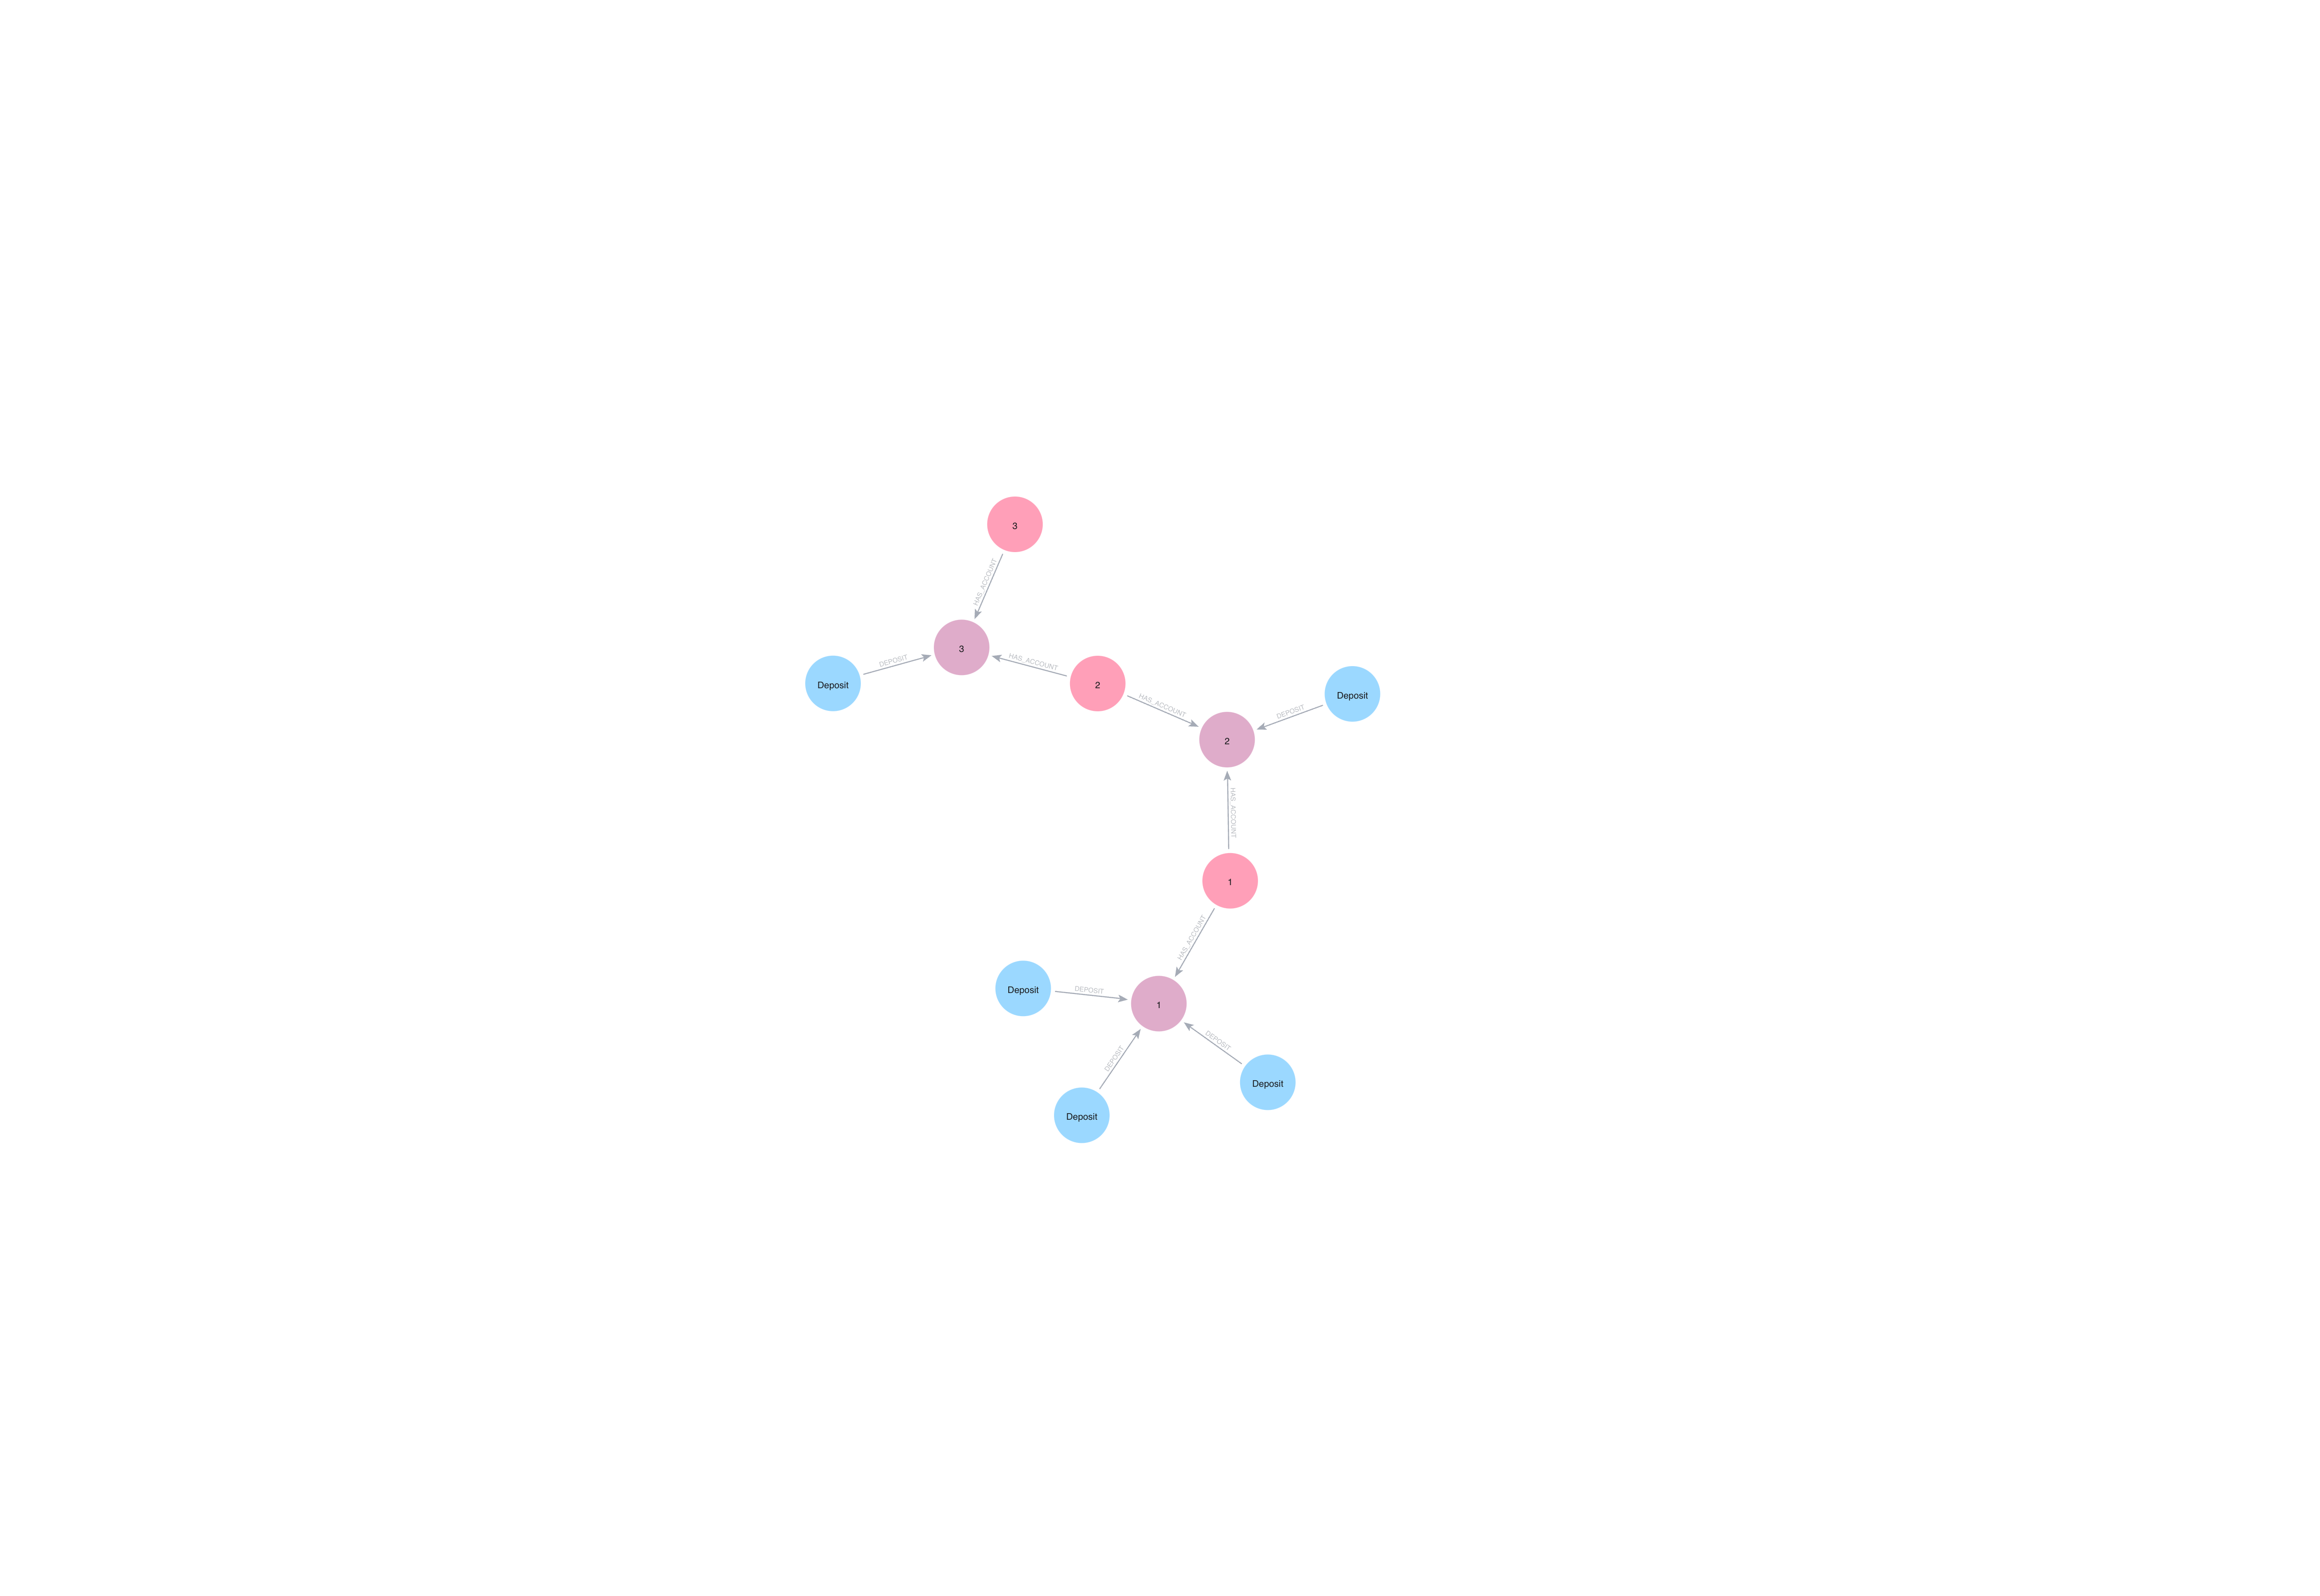

4.1.1 Campos requeridos

De acuerdo con los datos de prueba proporcionados y la estructura del caso de uso de fraude en reclamaciones, aquí está cómo puede ampliarse la sección de campos requeridos para incluir información sobre clientes, cuentas y depósitos:

Nodo Cliente:
	•	id: Identificador único del cliente

Nodo Cuenta:
	•	accountNumber: Identificador único de la cuenta
	•	accountType: Tipo de cuenta (por ejemplo, Interna, Externa), indicado por las etiquetas en los datos de prueba

Nodo Depósito:
	•	amount: Monto del depósito
	•	date: Fecha del depósito

Relaciones:
	•	HAS_ACCOUNT: Conecta un nodo Cliente con un nodo Cuenta.
	•	DEPOSIT: Conecta un nodo Depósito con un nodo Cuenta.

#Crear el grafo demo

```cypher
// Create customers
CREATE (c1:Customer {id: 1})
CREATE (c2:Customer {id: 2})
CREATE (c3:Customer {id: 3})

// Create accounts
CREATE (a1:Account:Internal {accountNumber: 1})
CREATE (a2:Account:Internal {accountNumber: 2})
CREATE (a3:Account:Internal {accountNumber: 3})

// Create relationships - some accounts are shared between customers
CREATE (c1)-[:HAS_ACCOUNT]->(a1)
CREATE (c1)-[:HAS_ACCOUNT]->(a2)
CREATE (c2)-[:HAS_ACCOUNT]->(a2)
CREATE (c2)-[:HAS_ACCOUNT]->(a3)
CREATE (c3)-[:HAS_ACCOUNT]->(a3)

// Create deposits
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 3000, date: datetime()-duration('P2M')}]->(a1)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 5000, date: datetime()-duration('P1M')}]->(a1)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 1000, date: datetime()}]->(a1)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 4000, date: datetime()}]->(a2)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 2000, date: datetime()}]->(a3)


```

# Veamos el esquema de la base de datos

# Explorar la base de datos
* Borra los nodos  !!!! SOLO EN CASO NECESARIO

```cypher
MATCH (n)
DETACH DELETE n
```



1. Ver todos los nodos y relaciones

Muestra todo el contenido de tu base de datos (nodos y relaciones):
```cypher
MATCH (n)-[r]->(m)
RETURN n, r, m
```




2. Ver todos los clientes y sus cuentas

Busca todos los clientes con sus cuentas asociadas:
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)
RETURN c.id AS customerId, a.accountNumber AS accountId
```


3. Ver los depósitos y las cuentas donde fueron hechos

Muestra la información de depósitos junto con las cuentas a las que están vinculados:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
RETURN d, a, r
```


4. Sumar el total de depósitos por cuenta

Calcula la suma total depositada en cada cuenta:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WITH a, sum(r.amount) AS totalDepositos
RETURN a.accountNumber AS accountId, totalDepositos
ORDER BY totalDepositos DESC
```




5. Mostrar la actividad de depósitos (monto y fecha)

Lista para cada accountNumber los depósitos con su monto y fecha:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
RETURN a.accountNumber AS accountId, r.amount AS monto, r.date AS fecha
ORDER BY fecha ASC
```



6. Encontrar cuentas compartidas por más de un cliente

Si quieres ver las cuentas que tienen más de un cliente asociado (propiedad shared accounts):
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)
WITH a, collect(c.id) AS listaClientes, count(c) AS numeroClientes
WHERE numeroClientes > 1
RETURN a.accountNumber AS accountId, listaClientes, numeroClientes
```


7. Buscar depósitos por encima de un monto específico

Por ejemplo, todos los depósitos mayores a 2,000:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WHERE r.amount > 2000
RETURN d, a, r.amount AS monto
```




8. Ver la suma total de depósitos por cliente

Combina la relación HAS_ACCOUNT con DEPOSIT para calcular la suma de depósitos para cada cliente:
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)<-[r:DEPOSIT]-(d:Deposit)
WITH c, sum(r.amount) AS totalCliente
RETURN c.id AS customerId, totalCliente
ORDER BY totalCliente DESC
```



9. Filtrar depósitos dentro de un rango de fechas

Por ejemplo, buscar depósitos de los últimos 2 meses:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WHERE r.date >= datetime() - duration('P2M')
RETURN d, a, r.amount AS monto, r.date AS fecha
ORDER BY r.date
```

(Revisa que tu base de datos use el mismo tipo de fecha y formato que en las creaciones con datetime().)


10. Visualizar el grafo (en Neo4j Browser)

Muestra todo el grafo sin direccionalidad, útil para una vista rápida en el Neo4j Browser:
```cypher

MATCH (n)-[r]-(m)
RETURN n, r, m
```
